In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

In [66]:
df = pd.read_excel('Dataset.xlsx', sheet_name='AQI')
display(df)
 

,Geo_Loc,Year,State,Pop_Est,TTL_Cnty,Cnty_Rpt,Dys_w_AQI,Dys_NM,Dys_Blw_Thr,Dys_Abv_Thr,...,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,POINT (-86.63186076199969 32.84057112200048),1980,Alabama,3900368,67,7,1382,1180,1169,213,...,8,0,1282,774,314,240,334,808,0,0
1,POINT (-147.72205903599973 64.84507995700051),1980,Alaska,405315,30,4,1184,280,1099,85,...,16,0,586,306,132,732,121,331,0,0
2,POINT (-111.76381127699972 34.865970280000454),1980,Arizona,2737774,15,7,1866,696,1561,305,...,7,0,1078,678,355,721,151,994,0,0
3,POINT (-92.27449074299966 34.74865012400045),1980,Arkansas,2288738,75,1,366,0,320,46,...,1,0,202,115,38,0,29,337,0,0
4,POINT (-120.99999953799971 37.63864012300047),1980,California,23800800,58,41,13728,1278,11221,2507,...,725,4,7869,4771,2215,1763,3685,8280,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,POINT (-78.45789046299967 37.54268067400045),2022,Virginia,8683619,134,32,5351,6329,5347,4,...,0,0,2282,1379,1008,336,521,3015,1369,110
2189,POINT (-120.47001078999972 47.52227862900048),2022,Washington,7785786,39,30,6276,4674,6262,14,...,0,0,2328,1242,687,1,23,1352,4714,186
2190,POINT (-80.71264013499967 38.66551020200046),2022,West Virginia,1775156,55,14,2119,2991,2118,1,...,0,0,1136,714,493,2,0,1244,711,162
2191,POINT (-89.81637074199966 44.39319117400049),2022,Wisconsin,5892539,72,29,6660,3925,6608,52,...,0,0,3202,1613,1062,2,2,4683,1959,14


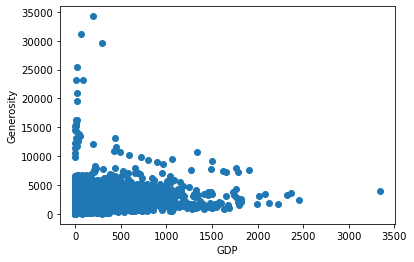

f(x) = b1x + b0
b1 = 0.6378224942897601
b0 = 2310.676523274869
R-squared: 0.00974446342998625
Correlation Coefficient (r): 0.09871404879745496


In [67]:
# x = GDP per capita
# y = generosity

X = df['Days CO']
Y = df['Max AQI']
mean_X = np.mean(X)
mean_Y = np.mean(Y)

plt.scatter(X, Y)
plt.xlabel('GDP')
plt.ylabel('Generosity')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

# c. Menampilkan parameter-parameter model
print("f(x) = b1x + b0")
print(f'b1 = {slope}')
print(f'b0 = {intercept}')

Y_pred = intercept + (slope * X)

# Calculate R-squared
ss_residual = np.sum((Y - Y_pred)**2)
ss_total = np.sum((Y - mean_Y)**2)
r_squared = 1 - (ss_residual / ss_total)

# Print the R-squared value
print(f'R-squared: {r_squared}')

numerator = np.sum((X - mean_X) * (Y - mean_Y))
denominator = np.sqrt(np.sum((X - mean_X)**2) * np.sum((Y - mean_Y)**2))
correlation_coefficient = numerator / denominator

# Print the correlation coefficient
print(f'Correlation Coefficient (r): {correlation_coefficient}')

